<a href="https://colab.research.google.com/github/Thota-naga-venkata-pramod/machinelearning_linear1/blob/master/simple_linear2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [129]:
x=pd.read_csv("/content/singlelinear.csv")

In [130]:
x

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [131]:
reg=linear_model.LinearRegression()    
reg.fit(x[['area']],x.price) #.fit() used to fit the model

LinearRegression()

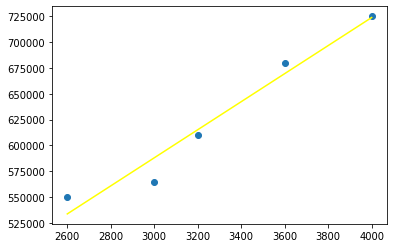

In [132]:
plt.scatter(x.area,x.price)
plt.plot(x.area,reg.predict(x[['area']]),color='yellow')

In [133]:
reg.predict([[6000]])  #y=mx+c  #y    #x=6000

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([995342.46575342])

In [134]:
reg.coef_        #m

array([135.78767123])

In [135]:
reg.intercept_    #c

180616.43835616432

In [136]:
y=pd.read_csv("/content/singlelinear2.csv")
y

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [137]:
new=reg.predict(y)

In [138]:
y['price of predicted']=new

In [139]:
y

,area,price of predicted
0,2600,533664.383562
1,3000,587979.452055
2,3200,615136.986301
3,3600,669452.054795
4,4000,723767.123288


In [140]:
y['result'] = x['price']  #adding the price column to the singlelinear2
y= y.rename(columns={'result': 'actual price'})# renaming the column
y

,area,price of predicted,actual price
0,2600,533664.383562,550000
1,3000,587979.452055,565000
2,3200,615136.986301,610000
3,3600,669452.054795,680000
4,4000,723767.123288,725000


#From now onwards we are calculating residuals

In [141]:
import statsmodels.api as sm

X = y['area']  # independent variable
y = y['actual price']   # dependent variable

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.resid                            #to get residuals

0    56823.144105
1    -4050.218341
2     3013.100437
3    -2860.262009
4   -33733.624454
dtype: float64

#we will use Python’s statsmodels module to implement Ordinary Least Squares(OLS) method of linear regression.

A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x) as : 
y=b1x+b0  

In OLS method, we have to choose the values of b1 and b0  such that, the total sum of squares of the difference between the calculated and observed values of y, is minimised.

<ipython-input-142-96694b06ef91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["predicted"]=reg.predict(X)


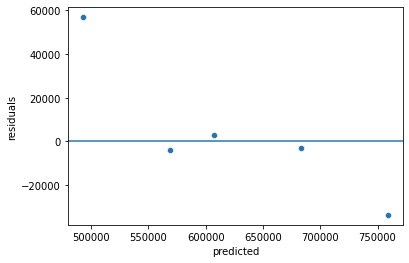

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
# create a DataFrame of predicted values and residuals
y["predicted"]=reg.predict(X)
y["residuals"] = reg.resid
sns.scatterplot(data=y, x="predicted", y="residuals")
plt.axhline(y=0)